# Машинное обучение, ВМК МГУ

## Практическое задание 3. Метод опорных векторов и логистическая регрессия

### Общая информация

Дата выдачи: 5 ноября 2021

Мягкий дедлайн: 23:59MSK 19 ноября 2021 (за каждый день просрочки снимается 1 балл)

Жесткий дедлайн: 23:59MSK 26 ноября 2021.

### О задании

В этом задании вы:
- настроите метод опорных векторов, визуализируете опорные вектора
- познакомитесь с калибровочными кривыми и сравните вероятности, выдаваемые логистической регрессией и методом опорных векторов
- изучите методы работы с категориальными переменными
- в качестве бонуса попробуете библиотеку vowpal wabbit.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — **10 баллов + 4.8 бонусов**.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.

<p style="color:#de3815;font-size:25px;">
Напоминание об оформлении и выполнении ноутбука
</p>

* Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть, не запуская ячейки (кроме редких случаев, когда необходимо намеренно скрыть ненужный output, про такие случаи желательно писать пояснения в тексте). **В противном случае -1 балл**
* При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. **Не нужно** удалять и видоизменять написанный код и текст, если явно не указана такая возможность. Создавать новые ячейки с кодом/текстов там, где это осмысленно и вы считаете необходимым, конечно, можно. **В противном случае -1 балл**
* В anytask обязательно нужно прикреплять отдельно файл с расширением ipynb (не в архиве, а именно отдельно). Если необходимо отправить еще какие-то файлы, то вынесите их в отдельный архив (если файлов много) и пришлите. **В противном случае -0.5 балла**
---
* Пишите, пожалуйста, выводы и ответы на вопросы в текстовых ячейках/при помощи print в коде/как результат вывода ячейки. При их отсутствии мы не можем понять, сделали ли вы задание и понимаете, что происходит, и **поэтому будем снижать баллы**
* Если алгоритм не сказано реализовывать явно, его всегда можно импортировать из библиотеки.
---
* Про графики. _Штрафы будут применяться к каждому результату команды отображения графика (plt.show() и др. аналогичные). Исключением являются графики, генерируемые функциями каких-либо сторонних библиотек, если их нельзя кастомизировать_

    * должно быть название (plt.title) графика; **В противном случае &ndash; -0.05 балла**
    * на графиках должны быть подписаны оси (plt.xlabel, plt.ylabel); **В противном случае &ndash; -0.025 балла за каждую ось**
    * должны быть подписаны единицы измерения (если это возможно); **В противном случае &ndash; -0.025 балла за каждую ось**
    * все названия должны быть понятны любому человеку, знакомому с терминологией, без заглядывания в код; **В противном случае &ndash; -0.05 балла**
    * подписи тиков на осях не должны сливаться как на одной оси, так и между ними; **В противном случае &ndash; -0.025 балла за каждую ось**
    * если изображено несколько сущностей на одном холсте (например несколько функций), то необходима поясняющая легенда (plt.legend); **В противном случае &ndash; -0.05 балла**
    * все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном); **В противном случае &ndash; -0.05 балла**
    * если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах);
    * графики должны быть не супер-микро и не супер-макро по размерам, так, чтобы можно было увидеть все, что нужно.
    * при необходимости улучшения наглядности графиков, можно пользоваться логарифмической шкалой по осям x/y.
    
### А также..

* Для удобства поиска вопросов, на которые от вас просят ответа, мы пометили их знаком **(?)**
* Знак **(!)** означает, что выполнение замечания необходимо для **возможности получения полного балла**
* Даем до +0.3 баллов за выдающиеся успехи по субъективному мнению проверяющих. Этот **бонус** не апеллируется

In [4]:
%pylab inline
import pandas as pd

from sklearn.datasets import load_diabetes, make_classification
from sklearn.model_selection import train_test_split

Populating the interactive namespace from numpy and matplotlib


## Часть 1. Метод опорных векторов и калибровка вероятностней

Сгенерируем синтетические данные.

In [254]:
X, y = make_classification(
    n_samples=100000, n_features=20, n_informative=10, n_redundant=10,
    random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

__Задание 1.__ Обучение и применение метода опорных векторов.

__(1 балл)__

Обучите метод опорных векторов. На занятиях мы проходили обычный вариант, что соответствует линейному ядру (LinearSVC/LinearSVR в scikit-learn).

In [5]:
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import roc_auc_score, precision_recall_curve, plot_roc_curve
from sklearn.metrics import plot_precision_recall_curve, average_precision_score
import numpy as np
from sklearn.metrics import PrecisionRecallDisplay

In [255]:
clf = LinearSVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_scores = clf.decision_function(X_test)

C:\Users\vk-ks\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [8]:
(y_pred == y_test).mean()

0.8487333333333333

На тестовой части посчитайте ROC-AUC, PR-AUC. Постройте ROC и PR кривые.

**Замечания**

* Обратите внимание, что ROC/PR-curve строится по предсказанным вероятностям (а не бинаризованым меткам ответов)
* Соответственно ROC/PR-AUC так же считается по предсказанным вероятностям

In [183]:
print(f'ROC-AUC: {roc_auc_score(y_test, y_scores)},\n PR-AUC: {average_precision_score(y_test, y_scores)}')

ROC-AUC: 0.92498942970994,
 PR-AUC: 0.9238950706362239


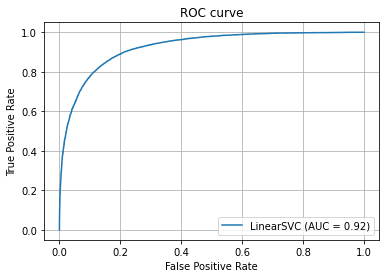

In [184]:
plot_roc_curve(clf, X_test, y_test)
plt.title('ROC curve')
plt.grid(True)
plt.show()

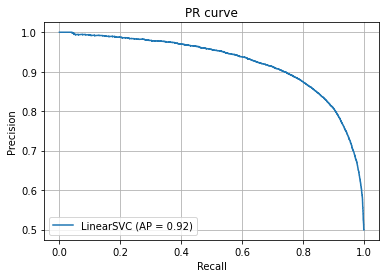

In [185]:
plot_precision_recall_curve(clf, X_test, y_test)
plt.title('PR curve')
plt.grid(True)
plt.show()

В названии метода присутствуют некоторые "опорные векторы". Сгенерируйте синтетический датасет с помощью make_classification с 2 признаками (хотя бы 100 объектов, но желательно больше), обучите на нём метод опорных векторов. Визуализируйте разделяющую прямую, все объекты и выделите опорные вектора (атрибут support\_vectors\_). В этот раз вместо LinearSVC воспользуйтесь SVC с линейным ядром (kernel='linear'), так как только в нём есть информация об опорных векторах.

**Замечания:**
* Графики должны быть оформлены правильно, в соответствии с теми требованиями, которые были в первой лабороторной. Так же опорные вектора следует рисовать не другим цветом, а другой **меткой** (например, крестик), иначе теряется принадлежность к классу. Точки из разных классов рисуйте **разными цветами** (или разными фигурами). Если необходимо, можно вводить альфа-канал (степень прозрачности) для улучшения восприятия. Можно (и очень рекомендуется) рисовать не только разделяющую прямую, но из "разделяющую полосу" вокруг прямой.
* **Обязательно пишите легенду,** поясняющую что изображено на полотне.

In [116]:
X, y = make_classification(100, n_features=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

In [117]:
clf = SVC(kernel='linear')
clf.fit(X, y)

SVC(kernel='linear')

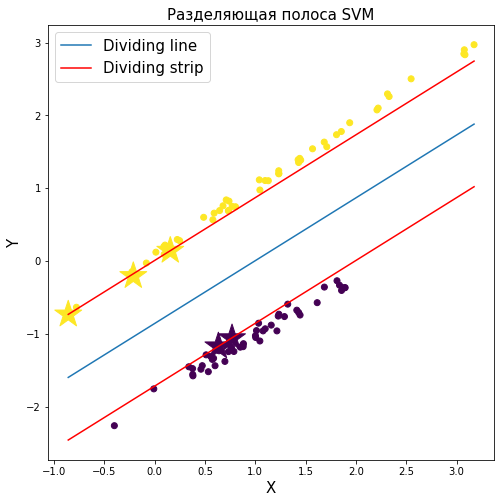

In [144]:
plt.figure(figsize=(8, 8))
plt.title('Разделяющая полоса SVM', fontsize=15)
plt.xlabel('X', fontsize=15)
plt.ylabel('Y', fontsize=15)
p_X = np.linspace(X[:, 0].min(), X[:, 0].max())
plt.plot(p_X, -(clf.intercept_[0] + clf.coef_[0][0] * p_X) / clf.coef_[0][1], label='Dividing line')
plt.plot(p_X, -(clf.coef_[0][0] * p_X) / clf.coef_[0][1] + clf.support_vectors_[0][1] + 
         clf.coef_[0][0] * clf.support_vectors_[0][0] / clf.coef_[0][1], color='red', label='Dividing strip')

plt.plot(p_X, -(clf.coef_[0][0] * p_X) / clf.coef_[0][1] + clf.support_vectors_[2][1] + 
         clf.coef_[0][0] * clf.support_vectors_[2][0] / clf.coef_[0][1], color='red' )
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=800, c=y[clf.support_], marker='*')
plt.legend(fontsize=15)
plt.grid(True)
plt.show()

__Задание 2.__ Калибровка вероятностей.

__(1.5 балла)__

Перейдём к оценке качества выдаваемых алгоритмами вероятностей. Начнём с калибровочных кривых. 

Допустим, алгоритм возвращает некоторые числа от нуля до единицы. Хорошо ли они оценивают вероятность? Для этого разобьем отрезок $[0, 1]$ на несколько маленьких отрезков одинаковой длины. Рассмотрим $i$-й отрезок с границами $[a_i, b_i]$ и предсказания $p_1, p_2, \dots, p_k$, которые попали в него. Пусть им соответствуют истинные ответы $y_1, y_2, \dots, y_k$. Если алгоритм выдает корректные вероятности, то среди этих истинных ответов должно быть примерно $(a_i + b_i) / 2$ единиц. Иными словами, если нарисовать кривую, у которой по оси X отложены центры отрезков, а по оси Y — доли единичных ответов этих в отрезках, то она должна оказаться диагональной. 

* Ниже приведена функция, которая должна рисовать такие кривые. В ней допущено две ошибки — найдите и исправьте их.

In [5]:
def plot_calibration_curve(y_test, preds):
    """
    preds --- array of probabilities
    """
    bin_middle_points = []
    bin_real_ratios = []
    n_bins = 20
    for i in range(n_bins):
        l = 1.0 / n_bins * i
        r = 1.0 / n_bins * (i + 1)
        bin_middle_points.append((l + r) / 2)
        bin_real_ratios.append(np.mean(y_test[(preds >= l) & (preds < r)]))
    plt.plot(bin_middle_points, bin_real_ratios)

* **(?)** Постройте калибровочные кривые для логистической регрессии и метода опорных векторов. Изучите распределение ответов классификаторов (постройте гистограммы с помощью plt.hist). Чем они различаются? Чем вы можете объяснить это?


**Замечания**
* Заметим, что метод опорных векторов не умеет predict_proba, но имеет метод decision_function.
* Для нормировки в [0,1] decision_function используйте MinMaxScaler
* Не используйте параметр probability=True при обучении SVM -- этот параметр неявно запускает калибровку предсказания https://scikit-learn.org/stable/modules/svm.html#scores-probabilities

In [6]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

In [118]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
proba_lr = log_reg.predict_proba(X_test)[:, 1]

In [237]:
X, y = make_classification(
    n_samples=100000, n_features=20, n_informative=10, n_redundant=10,
    random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [238]:
svm = LinearSVC()
svm.fit(X_train, y_train)
proba_svm = svm.decision_function(X_test)

scaler = MinMaxScaler()
proba_svm = scaler.fit_transform(proba_svm.reshape(-1, 1)).T[0]

C:\Users\vk-ks\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


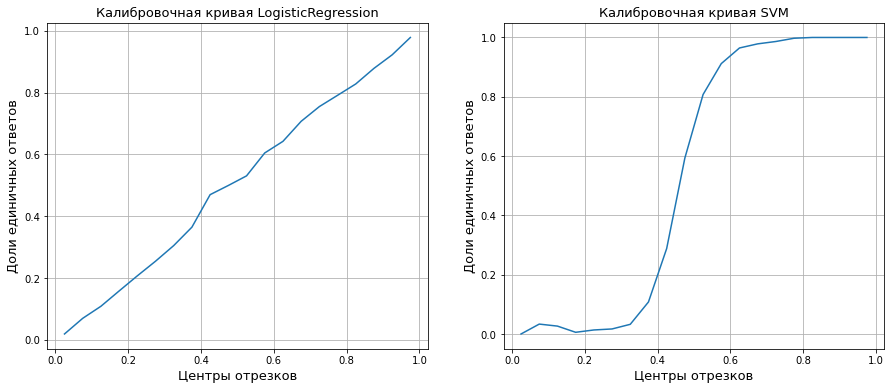

In [163]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.title('Калибровочная кривая LogisticRegression',fontsize=13)
plt.xlabel('Центры отрезков', fontsize=13)
plt.ylabel('Доли единичных ответов', fontsize=13)
plt.grid(True)
plot_calibration_curve(y_test, proba_lr)

plt.subplot(1, 2, 2)
plt.title('Калибровочная кривая SVM',fontsize=13)
plt.xlabel('Центры отрезков', fontsize=13)
plt.ylabel('Доли единичных ответов', fontsize=13)
plt.grid(True)
plot_calibration_curve(y_test, proba_svm)

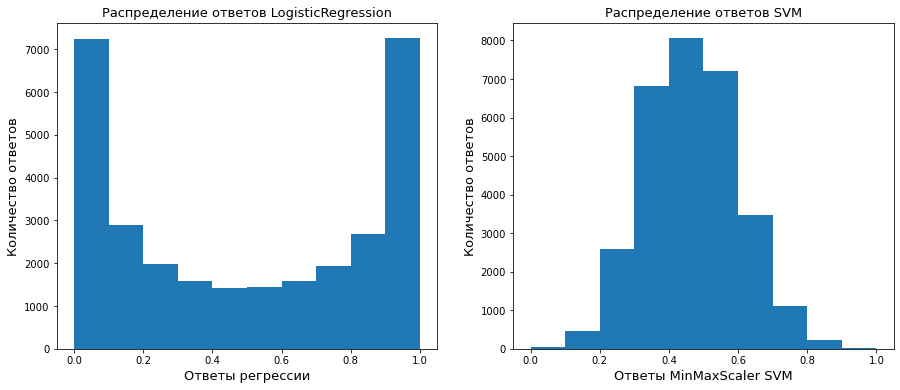

In [164]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.title('Распределение ответов LogisticRegression', fontsize=13)
plt.xlabel('Ответы регрессии', fontsize=13)
plt.ylabel('Количество ответов', fontsize=13)
plt.hist(proba_lr)

plt.subplot(1, 2, 2)
plt.title('Распределение ответов SVM', fontsize=13)
plt.xlabel('Ответы MinMaxScaler SVM', fontsize=13)
plt.ylabel('Количество ответов', fontsize=13)
plt.hist(proba_svm)
plt.show()

Видим, что калибровочная кривая для логистической регрессии почти диагональная, а для SVM она напоминает сигмоиду. Также можно заметить, что лог регрессия чаще выдаёт вероятности более близкие к 0 или к 1, что делает классификацию более уверенной, в отличае от SVM, который в основном выдаёт вероятности близкие к 0.5.

**(?)** Воспользуйтесь CalibratedClassifierCV из sklearn для калибровки вероятностей метода опорных векторов на обучении и постройте с его помощью предсказания для тестовой выборки. Нарисуйте для них калибровочную кривую. Улучшилась ли она?

In [6]:
from sklearn.calibration import CalibratedClassifierCV

In [24]:
calibr = CalibratedClassifierCV(svm)
calibr.fit(X_train, y_train)
proba_svm_calibr = calibr.predict_proba(X_test)[:, 1]

C:\Users\vk-ks\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\vk-ks\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\vk-ks\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\vk-ks\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\vk-ks\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

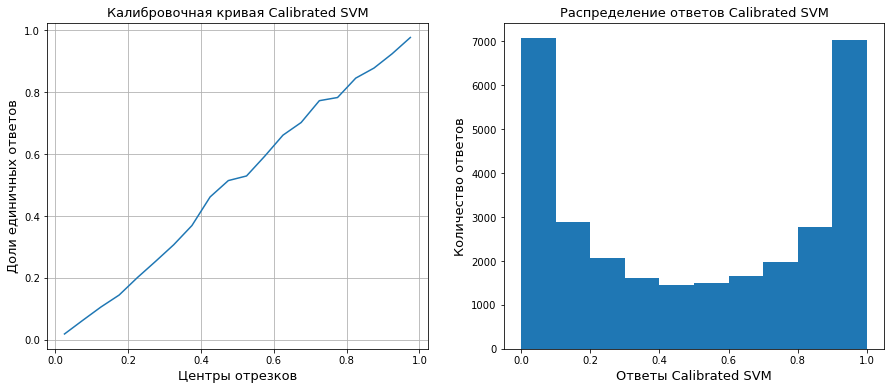

In [26]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.title('Калибровочная кривая Calibrated SVM',fontsize=13)
plt.xlabel('Центры отрезков', fontsize=13)
plt.ylabel('Доли единичных ответов', fontsize=13)
plt.grid(True)
plot_calibration_curve(y_test, proba_svm_calibr)

plt.subplot(1, 2, 2)
plt.title('Распределение ответов Calibrated SVM', fontsize=13)
plt.xlabel('Ответы Calibrated SVM', fontsize=13)
plt.ylabel('Количество ответов', fontsize=13)
plt.hist(proba_svm_calibr)
plt.show()

Заметим, что кривая намного улучшилась для откалиброванного SVM (стала очень близка к диагональной). Также улучшилась и уверенность в классификации (вероятности, в основном, близки к 0 и 1). Данный метод калибрует вероятности с помощью функции сигмоиды.

__Бонусное задание (1 балл).__ Реализуйте свою функцию для калибровки вероятностей. Опишите ваш подход и продемонстрируйте результаты.

Будем ипользовать тот же датасет, что и в 1 задании

In [332]:
X, y = make_classification(
    n_samples=100000, n_features=20, n_informative=10, n_redundant=10,
    random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [336]:
svm = LinearSVC()
svm.fit(X_train, y_train)
proba_svm = svm.decision_function(X_test)

C:\Users\vk-ks\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Посмотрим, какие ответы выдаёт SVM.

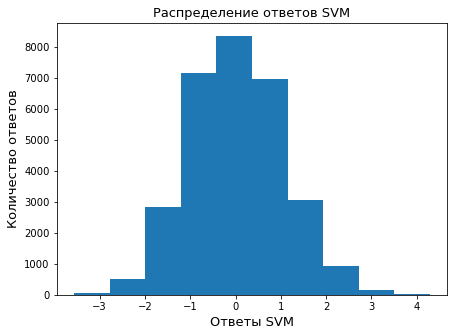

In [141]:
plt.figure(figsize=(7, 5))
plt.title('Распределение ответов SVM', fontsize=13)
plt.xlabel('Ответы SVM', fontsize=13)
plt.ylabel('Количество ответов', fontsize=13)
plt.hist(proba_svm)
plt.show()

Заметим, что распределение ответов похоже на нормальное. Приведём его к стандартному нормальному распределению (вычтем среднее и поделим на стандартное отклонение). И посчитаем вероятности для каждого ответа, использовав функцию распределения N(0, 1).

In [144]:
from scipy import stats as sts

In [334]:
def my_scaling_probas(proba):
    norm_proba = (proba - proba.mean()) / proba.std()
    proba_new = sts.norm.cdf(norm_proba)
    return proba_new

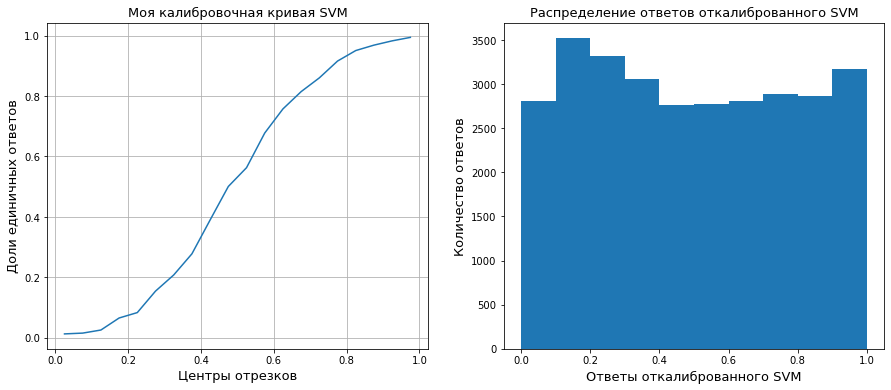

In [337]:
proba_new = my_scaling_probas(proba_svm)

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.title('Моя калибровочная кривая SVM',fontsize=13)
plt.xlabel('Центры отрезков', fontsize=13)
plt.ylabel('Доли единичных ответов', fontsize=13)
plt.grid(True)
plot_calibration_curve(y_test, proba_new)

plt.subplot(1, 2, 2)
plt.title('Распределение ответов откалиброванного SVM', fontsize=13)
plt.xlabel('Ответы откалиброванного SVM', fontsize=13)
plt.ylabel('Количество ответов', fontsize=13)
plt.hist(proba_new)
plt.show()

Заметим, что кривая немного улучшилась. Она стала ближе к диагональной, но всё равно похожа на сигмоиду. А распределение ответов, вообще похоже на равномерное распределение.

Попробуем другой способ. Откалибруем вероятности с помощью гистограмм.

In [120]:
import copy

In [247]:
def histogram(y_test, proba, bins=5000):
    proba_new = copy.deepcopy(proba)
    n = len(proba)
    
    min_pr, max_pr = proba.min(), proba.max()
    step = (max_pr - min_pr) / bins
    prob = 0
    for i in range(bins):
        l = min_pr + i*step
        r = min_pr + (i + 1)*step
        prob = np.sum(y_test[(proba >= l) & (proba < r)]) / len(proba[(proba >= l) & (proba < r)])
        proba_new[(proba >= l) & (proba < r)] = prob
    
    proba_new[proba_new > 1] = 1
    return proba_new

In [338]:
new = histogram(y_test, proba_svm)

<ipython-input-247-9065d589199a>:11: RuntimeWarning: invalid value encountered in long_scalars
  prob = np.sum(y_test[(proba >= l) & (proba < r)]) / len(proba[(proba >= l) & (proba < r)])


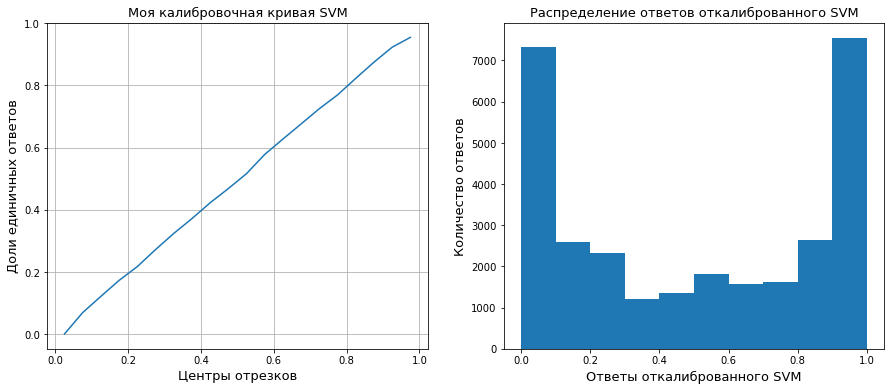

In [339]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.title('Моя калибровочная кривая SVM',fontsize=13)
plt.xlabel('Центры отрезков', fontsize=13)
plt.ylabel('Доли единичных ответов', fontsize=13)
plt.grid(True)
plot_calibration_curve(y_test, new)

plt.subplot(1, 2, 2)
plt.title('Распределение ответов откалиброванного SVM', fontsize=13)
plt.xlabel('Ответы откалиброванного SVM', fontsize=13)
plt.ylabel('Количество ответов', fontsize=13)
plt.hist(new)
plt.show()

Видно, что кривая вообще диагональна, а распределение ответов ещё лучше.\
Напишем свой калибратор.

Итак, опишем метод гистограмм.\
1) В первую очередь разделим обучающую выборку на обучающую и валидационную, по которой будем калибровать вероятности.\
2) Обучим наш классификатор (LinearSVC) на обучающей выборке и предскажем ответы для валидационной.\
3) Разделим всю область ответов на $n$ бинов $B_1, B_2, ..., B_n$, и сопоставим каждому бину эмпирическую вероятность попадания в него объекта из первого класса: $$P(x \in B_j)= \frac{\#(x_i \in B_j, y_i = 1)}{\#(x_i \in B_j)},$$ где #(...) - это количество объектов, удовлетворяющих условию в скобках, $x_i, y_i$ - объекты валидационной выборки.\
4) Далее по обученной модели предскажем ответы классификатора на тестовой выборке.\
5) Посмотрим, в какой бин попал каждый объект и присвоим ему соответствующую вероятность, полученную на 3 шаге

Так как мы будем делить обучающую выборку ещё и на валидационную, возьмём датасет в 5 раз больше предыдущего, чтобы качество было приемлемым.

In [345]:
X, y = make_classification(
    n_samples=500000, n_features=20, n_informative=10, n_redundant=10,
    random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [352]:
class HistCalibr():
    def __init__(self, num_bins = 2000):
        self.num_bins = num_bins
        
    def fit(self, X_train, y_train, X_val, y_val):
        self.svm = LinearSVC()
        self.svm.fit(X_train, y_train)
        dec_func = self.svm.decision_function(X_val)
        
        self.min_pr, self.max_pr = dec_func.min(), dec_func.max()
        self.step = (self.max_pr - self.min_pr) / self.num_bins
        prob = 0
        self.proba = np.zeros(self.num_bins)
        for i in range(self.num_bins):
            l = self.min_pr + i*self.step
            r = self.min_pr + (i + 1)*self.step
            prob = np.sum(y_val[(dec_func >= l) & (dec_func < r)]) / len(dec_func[(dec_func >= l) & (dec_func < r)])
            self.proba[i] = prob 
        
    def predict(self, X_test, y_test):
        dec_func = self.svm.decision_function(X_test)
        i = np.array((dec_func - self.min_pr) // self.step).astype('int')
        i[i >= self.num_bins] = self.num_bins - 1
        proba = self.proba[i]
        proba[proba < 0] = 0
        proba[proba > 1] = 1
        return proba

In [353]:
calibr = HistCalibr()

In [348]:
X_train_tr, X_val, y_train_tr, y_val = train_test_split(
    X_train, y_train, test_size=0.3, random_state=42)

In [354]:
calibr.fit(X_train_tr, y_train_tr, X_val, y_val)

C:\Users\vk-ks\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
<ipython-input-352-d70db0d8793a>:17: RuntimeWarning: invalid value encountered in long_scalars
  prob = np.sum(y_val[(dec_func >= l) & (dec_func < r)]) / len(dec_func[(dec_func >= l) & (dec_func < r)])


In [355]:
proba = calibr.predict(X_test, y_test)

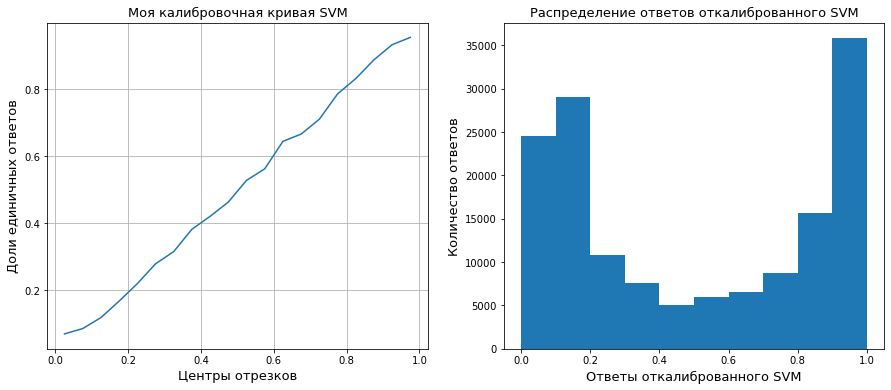

In [356]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.title('Моя калибровочная кривая SVM',fontsize=13)
plt.xlabel('Центры отрезков', fontsize=13)
plt.ylabel('Доли единичных ответов', fontsize=13)
plt.grid(True)
plot_calibration_curve(y_test, proba)

plt.subplot(1, 2, 2)
plt.title('Распределение ответов откалиброванного SVM', fontsize=13)
plt.xlabel('Ответы откалиброванного SVM', fontsize=13)
plt.ylabel('Количество ответов', fontsize=13)
plt.hist(proba)
plt.show()

Заметим, что результаты довольно хороши. Кривая довольно близка к диагональной. Распределение ответов также напоминает результаты встроенного метода калибровки.

Основным недостатком такого метода является тот факт, что чтобы получить хорошие результаты нам необходим довольно большой объём обучающей выборки.

## Часть 2. Логистическая регрессия.

__Задание 3.__ Обучение логистической регрессии на реальных данных и оценка качества классификации.

**(1 балл)**

__Подготовка данных.__

Загрузим данные с конкурса  [Kaggle Porto Seguro’s Safe Driver Prediction](https://www.kaggle.com/c/porto-seguro-safe-driver-prediction) (вам нужна только обучающая выборка). Задача состоит в определении водителей, которые в ближайший год воспользуются своей автомобильной страховкой (бинарная классификация). Но для нас важна будет не сама задача, а только её данные. При этом под нужды задания мы немного модифицируем датасет.

In [89]:
data = pd.read_csv('train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)

In [9]:
data.head(5)

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,,,,,,,,,,,,,,,,,,,,,
7,2,2,5,1,0,0,1,0,0,0,...,9,1,5,8,0,1,1,0,0,1
9,1,1,7,0,0,0,0,1,0,0,...,3,1,1,9,0,1,1,0,1,0
13,5,4,9,1,0,0,0,1,0,0,...,4,2,7,7,0,1,1,0,1,0
16,0,1,2,0,0,1,0,0,0,0,...,2,2,4,9,0,0,0,0,0,0
17,0,2,0,1,0,1,0,0,0,0,...,3,1,1,3,0,0,0,1,1,0


Пересемплируем выборку так, чтобы положительных и отрицательных объектов в выборке было одинаковое число. Разделим на обучающую и тестовую выборки.


In [90]:
# some resampling
np.random.seed(910)
mask_plus = np.random.choice(np.where(target == 1)[0], 100000, replace=True)
mask_zero = np.random.choice(np.where(target == 0)[0], 100000, replace=True)

data = pd.concat((data.iloc[mask_plus], data.iloc[mask_zero]))
target = np.hstack((target[mask_plus], target[mask_zero]))

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.5)

Обучите логистическую регрессию с удобными для вас параметрами. Сделайте предсказание на тестовой части выборки.

In [188]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
proba_lr = log_reg.predict_proba(X_test)[:, 1]

C:\Users\vk-ks\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [189]:
print(f'accuracy: {np.mean(y_pred == y_test)}')

accuracy: 0.58873


**(?)** Постройку ROC-кривую и Precision-Recall-кривую, посчитайте ROC-AUC и PR-AUC. Какие наблюдения и выводы по ним можно сделать? (В свободной форме)

In [190]:
print(f'ROC-AUC: {roc_auc_score(y_test, proba_lr)},\n PR-AUC: {average_precision_score(y_test, proba_lr)}')

ROC-AUC: 0.6236506649805695,
 PR-AUC: 0.6123012647378854


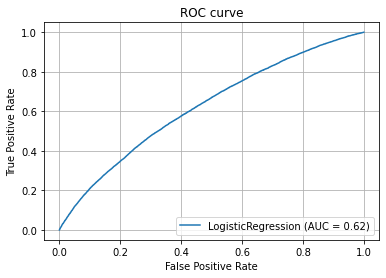

In [191]:
plot_roc_curve(log_reg, X_test, y_test)
plt.title('ROC curve')
plt.grid(True)
plt.show()

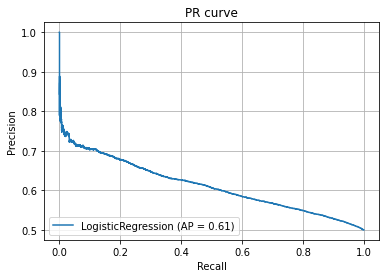

In [192]:
plot_precision_recall_curve(log_reg, X_test, y_test)
plt.title('PR curve')
plt.grid(True)
plt.show()

**Ответ: Можно заметить, что классификация довольно плоха, так как ROC кривая проходит довольно близко к диагонали (что соответствует плохому, случайному классификатору) и далеко от точки (0, 1) - идеальная модель. Площадь под ней всего 0.62, что довольно близко к 0.5(печально...). PR кривая так же далека от идеальной, как и площадь под ней(всего 0.61). Она далека от точки (1, 1), через которую проходит идеальный классификатор.**

__Задание 4.__ Изучение влияния регуляризатора на процесс обучения

__(1.5 балла)__

Проверьте на практике, как влияет регуляризатор на процесс обучения (убывание функции потерь на обучающей и отложенной выборках). Чтобы считать функцию потерь на отложенной выборке после каждой итерации, можно воспользоваться параметром `warm_start` у `sklearn.linear_model.LogisticRegression` либо методом `partial_fit` `sklearn.linear_model.SGDClassifier` (параметр `loss` тогда должен быть равен `log`).

Замечание:
* Для каждого $\alpha$ своя функция на графике; функции можно отображать на одном полотне **обязательно с легендой;** если $\alpha$ слишком много и на одном полотне они выглядят грязно, то можно строить на нескольких, однако в этом случае рекомендуется приводить масштаб и деления (min, max значения) на оси $y$ к одним  и тем же значениям --- так визуально будет очень просто сравнить графики и сделать выводы :)
* $\alpha$ желательно перебирать по **логарифмической шкале** (примерно как в первом задании), однако можно использовать информацию о том, что при некоторых значениях $\alpha$ модель не обучается хорошо и не исследовать их. Тут обязательно перебрать хотя бы 3 разных (степени в лог. шкале) $\alpha$, больше -- приветствуется.

In [94]:
from sklearn.metrics import log_loss

In [92]:
def plot_alpha(left, right, num, plot_num, X_val, y_val, title):
    plt.subplot(1, 2, plot_num)
    plt.title(title,fontsize=13)
    plt.xlabel('Номер итерации', fontsize=13)
    plt.ylabel('Loss', fontsize=13)
    plt.grid(True)

    alphas = np.logspace(left, right, num)
    for alpha in alphas:
        loss = []
        log_reg = LogisticRegression(warm_start=True, C=alpha, max_iter = 10)
        for itr in range(51):
            log_reg.fit(X_train, y_train)
            proba_lr = log_reg.predict_proba(X_val)

            loss += [log_loss(y_val, proba_lr)]
        plt.plot(np.arange(51)*10, loss, label=alpha)

    plt.legend(fontsize=15)

In [96]:
import warnings
warnings.filterwarnings('ignore')

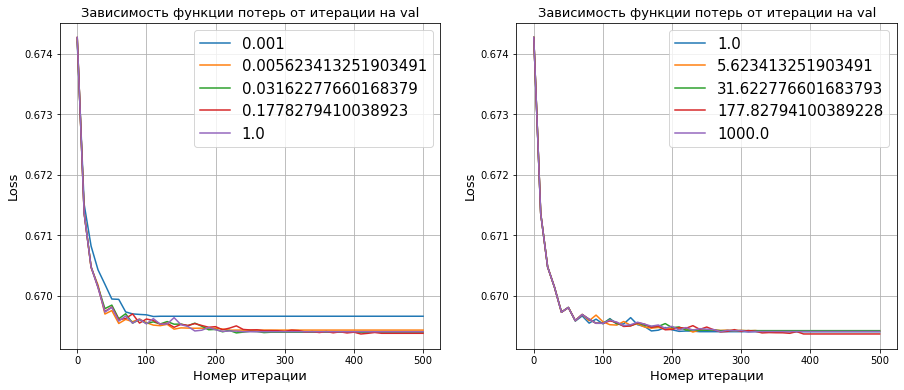

In [100]:
plt.figure(figsize=(15, 6))
title = 'Зависимость функции потерь от итерации на val'
plot_alpha(-3, 0, 5, 1, X_test, y_test, title)
plot_alpha(0, 3, 5, 2, X_test, y_test, title)
plt.show()

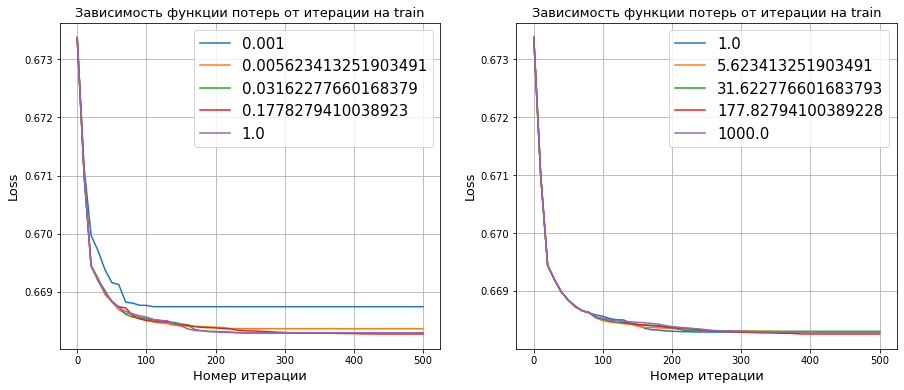

In [99]:
plt.figure(figsize=(15, 6))
title = 'Зависимость функции потерь от итерации на train'
plot_alpha(-3, 0, 5, 1, X_train, y_train, title)
plot_alpha(0, 3, 5, 2, X_train, y_train, title)
plt.show()

Заметим, что из всех проверенных нами регуляризаторов выделяется только один, равный 0.001. Поведение остальных же практически аболютно идентично.

## Часть 3. Работа с категориальными переменными

В этой части мы научимся обрабатывать категориальные переменные, так как закодировать их в виде чисел недостаточно (это задаёт некоторый порядок, которого на категориальных переменных может и не быть). Существует два основных способа обработки категориальных значений:
- One-hot-кодирование
- Счётчики (CTR, mean-target кодирование, ...) — каждый категориальный признак заменяется на среднее значение целевой переменной по всем объектам, имеющим одинаковое значение в этом признаке.

Начнём с one-hot-кодирования. Допустим наш категориальный признак $f_j(x)$ принимает значения из множества $C=\{c_1, \dots, c_m\}$. Заменим его на $m$ бинарных признаков $b_1(x), \dots, b_m(x)$, каждый из которых является индикатором одного из возможных категориальных значений:
$$
b_i(x) = [f_j(x) = c_i]
$$

В этой части работаем с датасетом из предыдущей части.

__Задание 5.__ Посчитайте качество (в этом задании будем работать c ROC-AUC) на исходных признаках при применении логистической регрессии.

__(0 баллов)__

In [12]:
%%time
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
proba_lr = log_reg.predict_proba(X_test)[:, 1]

Wall time: 2.97 s


C:\Users\vk-ks\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:
print(f'ROC-AUC: {roc_auc_score(y_test, proba_lr)}')

ROC-AUC: 0.6236506649805695


__Задание 6.__ Закодируйте все категориальные признаки с помощью one-hot-кодирования. Обучите логистическую регрессию и посмотрите, как изменилось качество модели (с тем, что было до кодирования). Измерьте время, потребовавшееся на обучение модели.

__(0.5 балла)__

In [13]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [14]:
cat_features = []
num_features = []
for col in X_train.columns:
    if 'cat' in col:
        cat_features += [col]
    else:
        num_features += [col]

In [15]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), cat_features),
    ('scal', StandardScaler(), num_features)
])

pipeline = Pipeline(steps=[
    ('ohe', column_transformer),
    ('log_reg', LogisticRegression())
])

In [16]:
%%time
model = pipeline.fit(X_train, y_train)
proba = model.predict_proba(X_test)[:, 1]

C:\Users\vk-ks\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Wall time: 4.14 s


In [58]:
print(f'ROC-AUC: {roc_auc_score(y_test, proba)}')

ROC-AUC: 0.632895759113699


Качество относительно сильно увеличилось. Данный способ кодирования увеличивает признаковое пространство, поэтому время работы чуть возросло.

Как можно было заменить, one-hot-кодирование может сильно увеличивать количество признаков в датасете, что сказывается на памяти, особенно, если некоторый признак имеет большое количество значений. Эту проблему решает другой способ кодирование категориальных признаков — счётчики. Основная идея в том, что нам важны не сами категории, а значения целевой переменной, которые имеют объекты этой категории. Каждый категориальный признак мы заменим средним значением целевой переменной по всем объектам этой же категории:
$$
g_j(x, X) = \frac{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)][y_i = +1]}{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)]}
$$

Отметим, что такие признаки сами по себе являются классификаторами и, обучаясь на них, мы допускаем "утечку" целевой переменной в признаки. Это ведёт к переобучению, поэтому считать такие признаки необходимо таким образом, чтобы при вычислении для конкретного объекта его целевая метка не использовалась. Это можно делать следующими способами:
1. Вычислять значение счётчика по всем объектам расположенным выше в датасете (например, если у нас выборка отсортирована по времени).
2. Вычислять по фолдам, то есть делить выборку на некоторое количество частей и подсчитывать значение признаков по всем фолдам кроме текущего (как делается в кросс-валидации).
3. Внесение некоторого шума в посчитанные признаки.

**Замечание (!)**
* При реализации счетчиков необходимо использовать один из методов борьбы с переобучением. В заданиях вам либо говорится, как использовать, либо вы выбираете сами

**(Бонусная часть)** Закодируйте категориальные переменные с помощью счётчиков (ровно так, как описано выше без каких-либо хитростей). Реализуйте корректное вычисление счётчиков самым простым способом — добавление шума к значениям (необходимо соблюсти баланс между избавление от переобучения и полезностью признаков). Снова обучите логистическую регрессию, оцените качество. Сделайте выводы. Не забудьте замерить время.

__(+0.5 баллa)__

In [432]:
X_train_new = X_train.copy(deep=True)
X_test_new = X_test.copy(deep=True)
X_train_new = X_train_new[:]
X_test_new = X_test_new[:]
for cat in cat_features:
    noise = np.random.normal(0, 0.05, 1)
    for val in np.unique(X_train[cat]):
        X_train_new = X_train_new[:]
        X_test_new = X_test_new[:]
        new_value = y_train[X_train[cat] == val].mean()
        X_train_new.loc[:, cat][X_train_new[cat] == val] = new_value + noise
        X_test_new.loc[:, cat][X_test_new[cat] == val] = new_value + noise

In [433]:
X_train_new

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,,,,,,,,,,,,,,,,,,,,,
1049183,0,0.487989,5,0.458492,0.469643,1,0,0,0,0,...,4,3,4,6,0,0,0,0,0,0
106872,1,0.487989,3,0.488788,0.469643,0,1,0,0,0,...,9,0,4,12,0,1,1,0,0,0
28943,6,0.501197,7,0.488788,0.469643,0,0,1,0,0,...,4,1,2,7,0,1,1,0,1,0
851826,1,0.487989,5,0.488788,0.469643,0,0,1,0,0,...,6,2,2,10,0,0,1,0,0,0
934813,0,0.487989,1,0.458492,0.602015,1,0,0,0,0,...,9,1,2,14,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
624097,3,0.487989,5,0.458492,0.469643,0,1,0,0,0,...,9,1,0,5,1,1,1,0,1,0
697975,0,0.501197,1,0.488788,0.469643,1,0,0,0,0,...,6,0,2,7,0,1,0,0,1,0
723907,5,0.487989,3,0.488788,0.469643,0,1,0,0,0,...,6,2,1,7,0,0,0,1,0,0


In [434]:
%%time
log_reg = LogisticRegression()
log_reg.fit(X_train_new, y_train)
proba_lr = log_reg.predict_proba(X_test_new)[:, 1]

Wall time: 1.92 s


C:\Users\vk-ks\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [435]:
print(f'ROC-AUC: {roc_auc_score(y_test, proba_lr)}')

ROC-AUC: 0.6247208625959805


**Ответ: Заметим, что качество работы алгоритма чуть улучшилось, а время уменьшилось. Таким образом, данное кодирование повышает точность работы модели, а добавление шума к признакам уменьшает степень переобученности алгоритма.**

__(Бонусная часть)__ Посчитайте корректные счётчики, основываясь на объектах расположеных выше в датасете (не забудьте добавить и шум). 

__(+0.5 балла)__

In [391]:
X_train_new = X_train.copy(deep=True)
X_test_new = X_test.copy(deep=True)
X_train_new = X_train_new[:]
X_test_new = X_test_new[:]
for cat in cat_features:
    noise = np.random.normal(0, 0.05, 1)
    for val in np.unique(X_train[cat]):
        num_prev_y = y_train[X_train[cat] == val].cumsum()
        num_prev_obj = np.arange(1, (X_train[cat] == val).sum() + 1)
        
        new_value = num_prev_y / num_prev_obj
        X_train_new.loc[:, cat][X_train[cat] == val] = new_value[1]
        X_train_new.loc[:, cat][X_train[cat] == val] = new_value + noise
        
        len_x_test = (X_test[cat] == val).sum()
        if len_x_test > len(new_value):
            new_value_last = np.ones(len_x_test - len(new_value)) * new_value[-1]
            new_value = np.hstack([new_value, new_value_last])
            X_test_new.loc[:, cat][X_test[cat] == val] = new_value + noise
        else:
            X_test_new.loc[:, cat][X_test[cat] == val] = new_value[1] + noise
            X_test_new.loc[:, cat][X_test[cat] == val] = new_value[:len_x_test] + noise

<ipython-input-391-84041538a1f1>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_new.loc[:, cat][X_train[cat] == val] = new_value[1]
<ipython-input-391-84041538a1f1>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_new.loc[:, cat][X_train[cat] == val] = new_value + noise
<ipython-input-391-84041538a1f1>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_new.loc[:, cat][X_test[cat] == val] = new_value[:len_x_tes

In [394]:
%%time
log_reg = LogisticRegression()
log_reg.fit(X_train_new, y_train)
proba_lr = log_reg.predict_proba(X_test_new)[:, 1]

Wall time: 2.13 s


C:\Users\vk-ks\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [395]:
print(f'ROC-AUC: {roc_auc_score(y_test, proba_lr)}')

ROC-AUC: 0.6190062929136907


Заметим, что качество уменьшилось, а время работы примерно осталось таким же.

А теперь ответьте на следующий вопрос: что будет, если некоторая категория встречается в выборке всего несколько раз? По этой причине производится сглаживание счётчиков. Например, на практике хорошие результаты показывает использование сглаживания средним по всей выборке:
$$
g_j(x, X) = \frac{\sum_{i=1}^{\ell} [f_j(x) = f_j(x_i)][y_i = +1] + C \times global\_mean}{\sum_{i=1}^{\ell} [f_j(x) = f_j(x_i)] + C}
$$
где $global\_mean$ — среднее значение целевой переменной по всей выборке, $C$ — параметр, определяющий степень сглаживания (например, можно использовать 10 или подобрать для каждого признака свой). Основная идея в том, что мы "разбавляем" среднее значение по некоторой категории глобальным средним значении. И тем меньше, чем большее количество объектов этой категории встречается в выборке. 

Однако для сглаживания вместо среднего значения целевой переменной можно использовать любое другое значение от 0 до 1 (этот параметр иногда называют $prior$). Можно сделать несколько признаков с разными значениями параметра. На практике в задачах бинарной классификации полезными бывают даже отрицательные значения!

__Задание 7.__ Реализуйте счетчики со сглаживанием, как описано выше. Обучите логистическую регрессию, оцените качество.

__(1 балл)__

In [55]:
X_train_new = X_train.copy(deep=True)
X_test_new = X_test.copy(deep=True)

C = 17
global_mean = y_train.mean()
for cat in cat_features:
    noise = np.random.normal(0, 0.05, 1)
    for val in np.unique(X_train[cat]):
        X_train_new = X_train_new[:]
        X_test_new = X_test_new[:]
        new_value = (y_train[X_train[cat] == val].sum() + C*global_mean) / ((X_train[cat] == val).sum() + C)
        X_train_new.loc[:, cat][X_train_new[cat] == val] = new_value + noise
        X_test_new.loc[:, cat][X_test_new[cat] == val] = new_value + noise

In [56]:
%%time
log_reg = LogisticRegression()
log_reg.fit(X_train_new, y_train)
proba_lr = log_reg.predict_proba(X_test_new)[:, 1]

Wall time: 2.24 s


C:\Users\vk-ks\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [57]:
print(f'ROC-AUC: {roc_auc_score(y_test, proba_lr)}')

ROC-AUC: 0.6250841390012116


Видим, что качество и время работы примерно такие же, как и в случае с кодированием категориальных признаков первым способом(после OneHot).

__Замечание.__ Усложнение методов вычисления счётчиков не делают результаты модели гарантированно лучше. Особенно с учётом того, что логистическая регрессия не такая сложная модель, чтобы переобучаться. Поэтому вы необязательно должны были получать на каждом шаге всё лучшие и лучшие результаты.

**(?)** Как вы должны были заметить, счётчики являются хорошей альтернативой one-hot-кодированию. Напишите, какие плюсы и минусы использования счётчиков по сравнению с one-hot-кодированием, вы заметили.

**Ответ: Счётчики повышают качество работы алгоритма, но one-hot-кодирование всё же показывает лучшие результаты. Но оно сильно увеличивает признаковое пространство, что влечёт увеличение во времени работы модели и необходимой памяти. Существует множество способов кодирования с помощью счётчиков. И всегда наилучшим может оказаться любой из них. Поэтому необходимо перебирать, как можно большее количество таких кодирований, чтобы достичь наилучшей точности и избежать переобучения.**

## Часть 4. Отбор признаков

Важной частью процесса построения модели является отбор признаков. На практике многие признаки оказывают малое влияние на модель (при этом их расчёт занимает время) или даже негативно сказываются на качестве модели. Попробуем несколько подходов отбора признаков, оценим, как они влияют на качество модели и сколько времени занимают.

Обратимся к тому же датасету про обращение клиентов по страховым случаям. Обойдёмся без сэмплирования объектов.

In [130]:
data = pd.read_csv('train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=124)

Как вы помните, в данных много категориальных признаков. Давайте закодируем их с помощью one-hot кодирования. Исходные колонки с категориальными признаками можно удалить. Сколько признаков мы получили?

In [59]:
cat_features = []
num_features = []
for col in X_train.columns:
    if 'cat' in col:
        cat_features += [col]
    else:
        num_features += [col]

In [60]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore", sparse=False), cat_features)
])

In [61]:
X_train_new = column_transformer.fit_transform(X_train)
X_test_new = column_transformer.fit_transform(X_test)

In [62]:
X_train_new = np.concatenate((X_train_new, X_train[num_features]), axis=1)
X_test_new = np.concatenate((X_test_new, X_test[num_features]), axis=1)

In [63]:
print("Size after OneHot:", X_train_new.shape[1])

Size after OneHot: 227


В качестве основной модели будем использовать логистическую регрессию, а целевой метрики — ROC-AUC. Обучите модель и посчитайте качество на тестовой выборке. Давайте запомним полученное значение.

In [64]:
%%time
log_reg = LogisticRegression()
log_reg.fit(X_train_new, y_train)
proba_lr = log_reg.predict_proba(X_test_new)[:, 1]

Wall time: 21.3 s


C:\Users\vk-ks\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [65]:
print(f'ROC-AUC: {roc_auc_score(y_test, proba_lr)}')

ROC-AUC: 0.6364451770051927


### Встроенные методы

Допустим, мы хотим оставить только 200 лучших признаков. Попробуем сделать это несколькими способами.

Начнём с отборам признаков с помощью линейной модели. Как известно, веса линейной модели означают вклад каждого признака в предсказание модели, а значит, модуль этого вклада можно интерпретировать как важность признаков. Такой метод отбора называются встроенным или embedded methods, так как он заложен в особенности модели.

__Задание 8.__ Оставьте 200 признаков с наибольшим модулем соответсвующего параметра линейной модели. Обучите модели заново и оцените её качество. Замерьте скорость такого отбора признаков (время обучения нашего метода отбора).

**(?)** Изменилось ли качество? Как?

__(0.5 балла)__

In [66]:
idx = argsort(np.abs(log_reg.coef_))[0][-200:]

In [70]:
%%time
log_reg = LogisticRegression()
log_reg.fit(X_train_new[:, idx], y_train)
proba_lr = log_reg.predict_proba(X_test_new[:, idx])[:, 1]

C:\Users\vk-ks\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Wall time: 31.1 s


In [68]:
print(f'ROC-AUC: {roc_auc_score(y_test, proba_lr)}')

ROC-AUC: 0.63876211691698


Качество немного увеличилось. Это может быть связано с тем, что мы убрали из выборки, неважные для классификации признаки, на которых наша модель переобучалась.

**(?)** А теперь давайте подумаем, что мы не учли. Мы предположили, что признаки вносят вклад равномерно, но не учли их масштаба. Если мы умножим один из признаков в 100 раз, то без учёта регуляризации его вес уменьшится в эти же 100 раз. А мы на основе этого отбираем признаки! Давайте сначала отнормируем признаки одним из способов, а только потом будем удалять признаки. 

Кстати, в таком случае надо пересчитать качество на всех признаках (сделайте это ниже). Если вы сделали нормирование признаков в самом начале, то попробуйте отобрать признаки на неотмасштабированных данных.

Что получилось?

In [73]:
cat_features = []
bin_features = []
num_features = []
for col in X_train.columns:
    if 'cat' in col:
        cat_features += [col]
    elif 'bin' in col:
        bin_features += [col]
    else:
        num_features += [col]

In [74]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore", sparse=False), cat_features),
    ('scal', StandardScaler(), num_features)
])

In [75]:
X_train_new_sc = column_transformer.fit_transform(X_train)
X_test_new_sc = column_transformer.fit_transform(X_test)

In [76]:
X_train_new_sc = np.concatenate((X_train_new_sc, X_train[bin_features]), axis=1)
X_test_new_sc = np.concatenate((X_test_new_sc, X_test[bin_features]), axis=1)

In [262]:
%%time
log_reg = LogisticRegression()
log_reg.fit(X_train_new_sc, y_train)
proba_lr = log_reg.predict_proba(X_test_new_sc)[:, 1]

Wall time: 23 s


C:\Users\vk-ks\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [263]:
print(f'ROC-AUC: {roc_auc_score(y_test, proba_lr)}')

ROC-AUC: 0.6380551242392177


In [264]:
idx_new = argsort(np.abs(log_reg.coef_))[0][-200:]

In [265]:
%%time
log_reg = LogisticRegression()
log_reg.fit(X_train_new_sc[:, idx_new], y_train)
proba_lr = log_reg.predict_proba(X_test_new_sc[:, idx_new])[:, 1]

C:\Users\vk-ks\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Wall time: 26.7 s


In [266]:
print(f'ROC-AUC: {roc_auc_score(y_test, proba_lr)}')

ROC-AUC: 0.638242780921624


Заметим, что изначально качество довольно сильно увеличилось. Это можно объяснить тем, что признаки могут иметь разную масштабность, и чтобы веса у признаков были одинаковы по величине, необходимо нормировать признаки.\
После того, как мы убрали веса, качество тоже увеличилось. Но не так эффектно, как без нормировки.

### Методы фильтрации

Давайте отбирать признаки умнее, а именно через подсчёт некоторой функции для каждого признака. На основании значений этой функции будем оставлять наиболее важные признаки. Методы этого семейства называют фильтрующими или  filter methods. 

В качестве такой функции будем считать t-статистику:

$$t(x) = \frac{|\mu_+ - \mu_-|}{\sqrt{\frac{n_+ \sigma^2_+ + n_- \sigma^2_-}{n_+ + n_-}}},$$

где $\mu_{+/-}$, $\sigma_{+/-}$, $n_{+/-}$ соответственно это --- среднее; среднеквадратичное отклонение; количество объектов каждого из классов.

__Задание 9.__ Оставьте 200 признаков с наибольшим значением и замерьте качество. Не забудьте замерить скорость отбора признаков (время обучения нашего метода отбора) в этом случае.

__(0.5 балла)__

In [240]:
def t_stat(X, y):
    res = []
    y_plus = y_train == 1
    y_minus = ~y_plus
    
    x_pl = X[y_plus]
    x_mn = X[y_minus]

    mu_pl, std_pl = x_pl.mean(axis=0), x_pl.std(axis=0)
    mu_mn, std_mn = x_mn.mean(axis=0), x_mn.std(axis=0)
    n_pl, n_mn = y_plus.sum(), y_minus.sum()
        
    res = np.abs(mu_pl - mu_mn) / np.sqrt((n_pl * (std_pl ** 2) + n_mn * (std_mn**2)) / (n_pl + n_mn))
    
    return res

Посмотрим сначала с неотмасштабированными признаками

In [267]:
%%time
t = t_stat(X_train_new, y_train)

Wall time: 7.77 s
Parser   : 250 ms


In [269]:
idx = argsort(t)[-200:]

In [270]:
%%time
log_reg = LogisticRegression()
log_reg.fit(X_train_new[:, idx], y_train)
proba_lr = log_reg.predict_proba(X_test_new[:, idx])[:, 1]

C:\Users\vk-ks\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Wall time: 50.3 s


In [271]:
print(f'ROC-AUC: {roc_auc_score(y_test, proba_lr)}')

ROC-AUC: 0.6385915265350248


Теперь проверим качество работы с нормированными численными признаками.

In [272]:
%%time
t = t_stat(X_train_new_sc, y_train)

Wall time: 7.71 s


In [273]:
idx = argsort(t)[-200:]

In [274]:
%%time
log_reg = LogisticRegression()
log_reg.fit(X_train_new_sc[:, idx], y_train)
proba_lr = log_reg.predict_proba(X_test_new_sc[:, idx])[:, 1]

C:\Users\vk-ks\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Wall time: 27.8 s
Parser   : 227 ms


In [275]:
print(f'ROC-AUC: {roc_auc_score(y_test, proba_lr)}')

ROC-AUC: 0.638606531161828


Качество работы алгоритма примерно такое же, как и в случае с простым отбрасыванием признаков, имеющих наименьшие по модули веса. Время работы алгорима примерно такое же. А время отбора признаков составляет 7-8 секунд.

### Методы-обёртки

__Задание 10.__ 

__(1 балл)__

Заключительный из рассматриваемых нами методов работает следующим образом: мы исключаем по очереди один из признаков и смотрим, как это влияет на качество. Удаляем признаки таким жадным способом, пока не достигнем некоторого критерия (количество признаков или ухудшением качества).

Заметим, что нельзя оценивать качество по тестовой выборке, иначе мы можем переобучиться, как, например, при настройке гиперпараметров. Разделите выборку на 2 части, на одной из них обучайте модель без одного из признаков,  на второй части оценивайте качество. Исходную тестовую выборку стоит использовать только на финальной оценке качества.

Сделайте одну итерацию и прикиньте, сколько времени займёт такой отбор признаков. Кажется, что чересчур. Давайте возьмём маленький сэмпл данных (например, в 10 тысяч объектов), что сильно уменьшит время итерации. Теперь это долго, но уже приемлемо. 

**Напишите функцию, которая отбирает признаки вышеприведенным способом (использовать готовые решения аналогичных библиотечных функций нельзя)**

**Замечание**
* Если это всё ещё долго для вашего комьютера, можете попробовать брать не по одному признаку, а сразу по пять (и удалять сразу тоже по 5). Для этого перед каждой итерацией удаления делите заново все признаки на группы по 5 штук.

Снова оставьте только 200 признаков и оцените качество на тестовой выборке. Сколько времени занял такой отбор признаков?

In [123]:
def bad_idx(X_train, X_val, y_train, y_val):
    idx = []
    X_train_new = copy.deepcopy(X_train)
    X_val_new = copy.deepcopy(X_val)
    for i in range(27):
        max_auc = 0
        for j in range(X_train_new.shape[1]):
            X_train_loo = np.delete(X_train_new, j, axis = 1)
            X_val_loo = np.delete(X_val_new, j, axis = 1)
            
            log_reg = LogisticRegression()
            log_reg.fit(X_train_loo, y_train)
            proba_lr = log_reg.predict_proba(X_val_loo)[:, 1]
            
            roc_auc = roc_auc_score(y_val, proba_lr)
            if roc_auc > max_auc:
                max_auc = roc_auc
                idx_max_auc = j
        
        for index in range(X_train.shape[1]):
            if (X_train[:, index] == X_train_new[:, idx_max_auc]).sum() == X_train_new.shape[0]:
                idx += [index]
                break
        X_train_new = np.delete(X_train_new, idx_max_auc, axis = 1)
        X_val_new = np.delete(X_val_new, idx_max_auc, axis = 1)

    return idx

In [139]:
X_batch = X_train_new[:10000]
X_val = X_train_new[10000:20000]

y_batch = y_train[:10000]
y_val = y_train[10000:20000]

In [140]:
%%time
idx = bad_idx(X_batch, X_val, y_batch, y_val)

Wall time: 46min 4s


In [141]:
good_idx = np.delete(np.arange(X_train_new.shape[1]), idx)

In [143]:
%%time
log_reg = LogisticRegression()
log_reg.fit(X_train_new[:, good_idx], y_train)
proba_lr = log_reg.predict_proba(X_test_new[:, good_idx])[:, 1]

Wall time: 30.3 s


In [144]:
print(f'ROC-AUC: {roc_auc_score(y_test, proba_lr)}')

ROC-AUC: 0.636143087348864


In [138]:
X_batch = X_train_new_sc[:10000]
X_val = X_train_new_sc[10000:20000]

y_batch = y_train[:10000]
y_val = y_train[10000:20000]

In [124]:
idx = bad_idx(X_batch, X_val, y_batch, y_val)

In [125]:
good_idx = np.delete(np.arange(X_train_new_sc.shape[1]), idx)

In [136]:
log_reg = LogisticRegression()
log_reg.fit(X_train_new_sc[:, good_idx], y_train)
proba_lr = log_reg.predict_proba(X_test_new_sc[:, good_idx])[:, 1]

In [137]:
print(f'ROC-AUC: {roc_auc_score(y_test, proba_lr)}')

ROC-AUC: 0.6373379180059965


Данный способ показал чуть худшие результаты по отбору признаков. Возможно это произошло из-за того, что мы взяли мало объектов для обучения и модель недообучилась. Либо же наоборот мы выбрали "однотипные" объекты и алгоритм переобучился под них.

**(?)** Давайте подведём итоги по отбору признаков. Назовите преимущества и недостатки каждого из методов. Какой метод привёл к наилучшему качеству?

**Ответ: Последний способ("жадный") показал чуть худшее качество работы, а также он оказался очень ресурсоёмким. Время отбора признаков даже на 10000 объектов занимает практически 50 минут. Отбор признаков по коэффициентам и на основе t-статистике показали примерно одинаковые результаты работы. Наилучшим из них оказался 1 метод (отбор по весам модели). Этот метод хорош, если между признаками и таргетом действительно наблюдается линейная связь. В то время как второй из них (t-статистика является более универсальным методом). Также не стоит забывать про нормировку численных признаков. Как правило, это даёт увеличение в качестве работы алгоритма.**

## Часть 5. Настройка порога для бинаризации вероятностей

В этой части мы будем проделывать стандартные операции для подготовки модели к её реальному использованию — подбора порога для бинаризации вероятностей с учётом потребностей бизнеса или продукта. Хороший алгоритм с точки зрения ROC-AUC это, конечно, хорошо, но ведь в реальности нам надо принимать решение бинарно, например, выдавать ли кредит человеку. 

Воспользуемся той же самой задачей, что и в предыдущем разделе — определение обращение клиента в страховую в ближайшее время. Положительные объекты в нашей выборки как раз обратившиеся в страховую клиенты. 

Не вдаваясь в подробности бизнеса страховых, можно понять, что обращение клиента по страховому случаю для нас как страховой невыгодно, ведь мы теряем на этом деньги. Клиенты, которые не обращаются в страховую и ездят аккуратно, приносят нам деньги.

Пусть на каждом клиенте, который обратился в нашу страховую, мы теряем 100000, а на клиенте, который не обратился в страховую, мы зарабатываем 5000. 

Будем строить алгоритм, который прогнозирует обращение по страховому случаю, чтобы некоторым потенциальным клиентам отказывать в обслуживании, если мы уверены, что на них мы потеряем деньги.

In [67]:
data = pd.read_csv('train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=124)

**Задание 11 (0.5 балла)**

В этот раз мы не будем сэмплировать данные и будем использовать их "как есть".

**(?)** Посчитайте долю положительных примеров в выборке? Скажите, почему она такая?

In [5]:
(y_train == 1).sum() / len(y_train)

0.036484945471040746

Доля положительных примеров - это доля возникших страховых случаев. Она примерно равна 3.5%. Их так мало, потому что они возникают довольно редко, и страховой компании было бы невыгодно, чтобы они происходили.

Как вы помните, в данных много категориальных признаков. Давайте закодируем их с помощью one-hot кодирования. Исходные колонки с категориальными признаками можно удалить.

In [6]:
cat_features = []
num_features = []
for col in X_train.columns:
    if 'cat' in col:
        cat_features += [col]
    else:
        num_features += [col]

In [7]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore", sparse=False), cat_features)
])

In [8]:
X_train_new = column_transformer.fit_transform(X_train)
X_test_new = column_transformer.fit_transform(X_test)

X_train_new = np.concatenate((X_train_new, X_train[num_features]), axis=1)
X_test_new = np.concatenate((X_test_new, X_test[num_features]), axis=1)

В качестве нашей основной модели будем использовать логистическую регрессию, которая возвращает вероятность положительного класса. Обучите модель, сделайте предсказания на тестовой выборке.

In [210]:
%%time
log_reg = LogisticRegression()
log_reg.fit(X_train_new, y_train)
proba_lr = log_reg.predict_proba(X_test_new)[:, 1]

C:\Users\vk-ks\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Wall time: 30.6 s


**(?)** Посчитайте ROC-AUC. Что вы можете про него сказать? Как вы считаете, почему получилось так?

In [174]:
precision, recall, thresholds = precision_recall_curve(y_test, proba_lr)
print(f'ROC-AUC: {roc_auc_score(y_test, proba_lr)},\n PR-AUC: {average_precision_score(y_test, proba_lr)}')

ROC-AUC: 0.6364451770051927,
 PR-AUC: 0.06349403671188139


Площадь под ROC кривой довольно близка к 0.5, что соответствует плохому (случайному) классификатору. Это может быть связано с тем, что в наших данных неравномерное распределение по классам. Объектов 0-го класса существенно больше. Так же это можно объяснить тем, что лог регрессия довольно лёгкая модель и она легко может переобучиться.

**(?)** Постройте precision-recall кривую на тестовой выборке. Что вы можете по ней сказать?

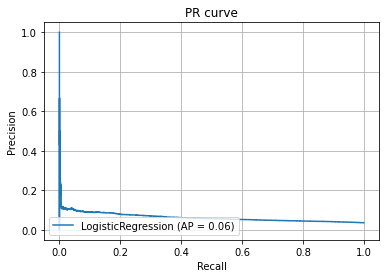

In [177]:
plot_precision_recall_curve(log_reg, X_test_new, y_test)
plt.title('PR curve')
plt.grid(True)
plt.show()

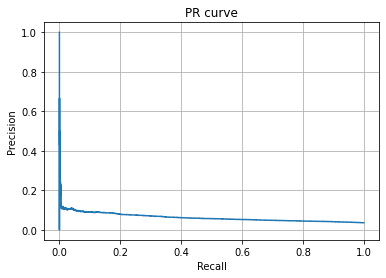

In [346]:
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.title('PR curve')
plt.grid(True)
plt.show()

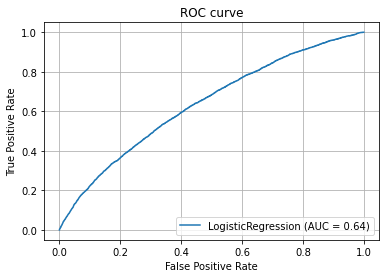

In [345]:
plot_roc_curve(log_reg, X_test_new, y_test)
plt.title('ROC curve')
plt.grid(True)
plt.show()

По графику PR кривой можно сказать, что наша модель довольно плохо решает задачу, т.к. она проходит в нижней части графика (precision < 0.2). И площадь под ней соответственно очень мала.

У нас есть алгоритм, который определяет вероятность обращения клиента по страховому случаю, но мы хотим использовать этот алгоритм, чтобы отказывать клиентам в обслуживании в страховой. Для этого нам нужны бинарные предсказания алгоритма. Давайте искать этот порог для получения бинарных предсказаний.

__Задание 12.__

__(0.5 балла)__

Предположим, что нам надо подобрать порог такой, чтобы среди наших положителных предсказаний 95\% действительно обратились бы по страховому случаю. Подберите соответствующий порог, оцените на нём precision, recall. Скажите, какой части потенциальных клиентов мы откажем (т.е доля тех клиентов (среди всех клиентов тестовой выборки), которых мы пометили единичками, но у которых на самом деле был 0 в y_test)?

**Замечание-подсказка (!)**
* Порог нужно искать по precision

In [89]:
precision >= 0.95, (precision >= 0.95).sum()

(array([False, False, False, ..., False, False,  True]), 1)

In [194]:
thresholds[-1]

0.31735622919093265

In [90]:
preds_new = []
for pr in proba_lr:
    if pr > thresholds[-1]:
        preds_new += [1]
    else:
        preds_new += [0]

In [92]:
preds_new = np.array(preds_new)
preds_new[y_test == 0].sum() / (y_test == 0).sum()

0.0

Таким образом, мы откажем только $0.0$ потенциальных клиентов. Т.е. вообще никому из них мы не откажем.

Иногда сложно решить, какие значения precision и recall нужны в нашей задаче. Однако иногда можно оценить экономический эффект от нашего алгоритма. Мы знаем, во сколько нам обходится клиент, который обратился в страховую, и сколько нам приносит клиент, который не обратился. 

При фиксированном пороге мы знаем, кому мы бы отказали в обслуживании. Среди них есть те, кто обратился бы в страховую и нам пришлось бы потратить деньги (читай: y_pred_i = 1, y_test_i = 1), и те, кто не обратился бы, то есть принёс бы нам деньги (читай: y_pred_i = 1, y_test_i = 0). Мы можем посчитать разницу между нашими доходами и расходами от этой группы людей и надеяться, что она будет положительной.  

__Задание 13.__ Найдите такой порог, при котором наш баланс (разница между доходами и расходами на группе клиентов, которым мы отказали) неотрицательный. 

__(0.5 баллa)__

In [213]:
profit, expenses = 5000, 100000
preds_new = np.zeros(len(proba_lr))
res, max_sum, best_tr, num_ref = [], 0, 0, 0
for tr in thresholds:
    summ = 0
    for i in range(len(proba_lr)):
        if proba_lr[i] >= tr:
            preds_new[i] = 1
        else:
            preds_new[i] = 0
    num_0 = preds_new[y_test == 0].sum()
    num_1 = preds_new[y_test == 1].sum()
    summ = num_0*profit - num_1*expenses
    if summ > 0:
        res += [(tr, summ)]
    if summ > max_sum:
        max_sum = summ
        best_tr = tr
        num_ref = num_0 + num_1

In [218]:
len(res), res[:10]

(53240,
 [(0.01171869539375989, 140835000.0),
  (0.01172308244811713, 140935000.0),
  (0.011723428530397104, 140930000.0),
  (0.011730520809460758, 140925000.0),
  (0.011731190324131323, 140920000.0),
  (0.011732914309453753, 140915000.0),
  (0.011738708536313426, 140910000.0),
  (0.01173976913824039, 140905000.0),
  (0.011748198902255933, 140900000.0),
  (0.011752445750263655, 140895000.0)])

**(?)** А на каком значении порога это разнциа максимальна? Скольким клиентам мы отказали в обслуживании?

In [222]:
print(f'Max difference between profit and expenses: {max_sum},\nThreshold for it: {best_tr}')

Max difference between profit and expenses: 140935000.0,
Threshold for it: 0.01172308244811713


In [226]:
print(f'Number y_pred = 1: {int(num_ref)}')

Number y_pred = 1: 118907


Разница максимальна при значении порога равному 0.01. При этом мы откажем 118907 клиентам.

## Часть 6 (бонус). Vowpal Wabbit

В этой части мы научимся использовать библиотеку [vowpal wabbit](https://github.com/JohnLangford/vowpal_wabbit). У неё есть несколько особенностей:
- можно обучать только линейные модели, но за счёт большого количества опций и возможностей по усложнению, можно построить и довольно сложные вещи
- можно обучаться на выборках, которые не помещаются в оперативную память
- можно обрабатывать большое количество признаков (например, мешки слов текстов) и "на ходу" строить на них комбинации (не переделывать датасет)
- другие особенности, как например, активное обучение и возможность распараллеленного обучения.

Основные особенности при использовании следующие:
- Свой формат данных: "label |A feature1:value1 |B feature2:value2", позволяющий, во-первых, указывать не все признаки (не нужно хранить много нулей в разреженных данных), а во-вторых, группировать и иметь возможность отключать или взаимодействовать ("отключать", добавлять квадратичные признаки и т.д.) сразу со всей группой признаков. По этой причине вам понадобится реализовать конвертер датасета и загрузку своих предсказаний, чтобы посчитать качество предсказаний.
- Запуск обучения из командной строки (однако можно запускать эти же команды из ноутбука).

В этот раз мы будем использовать данные с конкурса [Kaggle Avazu Click-Through Rate Prediction](https://www.kaggle.com/c/avazu-ctr-prediction) по предсказанию кликов (бинарная классификация). В обучающей выборке 40kk строк, так что у вас не должно быть желания загружать их в оперативную память. Предлагается взять первые 30kk строк в качестве обучающей выборке и оставшуюся часть для тестирования.

<font color="red"> !!ВНИМАНИЕ!! ХАЛЯВНЫЕ БАЛЛЫ!! ЗАДАНИЕ НА 1 БАЛЛ НЕСЛОЖНОЕ И ОЧЕНЬ ПОЛЕЗНОЕ!!</font>

__Задание 14.__ Работа с vowpal wabbit. 

- Скачайте данные, разделите их на обучающую и тестовую выборки.
- Подготовьте функции для конвертирования датасета в формат vowpal wabbit и для загрузки предсказаний в ноутбук для подсчёта функционала.
- Сделайте простейшее решение на vowpal wabbit. Оцените качество.
- Изучите возможности и параметры vowpal wabbit. Поэксперементируйте. 
- Расскажите, что интересного вы узнали (какие-нибудь особенности, режимы работы, фишки, параметры).
- Удалось ли вам улучшить качество базовой модели? Насколько? Что ещё можно было бы попробовать?

В этом задании предусмотрены баллы по двум критериям:
- Мы видим, что вы **"поигрались" с vw**, а именно: запуск vw, обучение модели и предсказание ответов на нашем датасете (2-3 попытки обучения с разными параметрами, если не достигли 0.738), изменение значения/включения/выключения 2-3 параметров обучения с описанием того, что они делают. Несколько занимательных фактов и возможностей vowpal-wabbit __(1 балл)__.
- Достижение ROC-AUC на отложенной выборки более 0.738 __(1.5 баллa)__

In [69]:
from vowpalwabbit import pyvw